In [5]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())

print("\nGender Submission Dataset:")
print(gender_submission_df.head())


Train Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [6]:
# Display basic information about the datasets
print("Train Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

print("\nGender Submission Dataset Info:")
print(gender_submission_df.info())

# Check for missing values in the datasets
print("\nMissing values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing values in Test Dataset:")
print(test_df.isnull().sum())


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

In [7]:
# Fill missing 'Age' with the median age in both train and test datasets
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most common embarkation point in the train dataset
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Fare' in the test dataset with the median fare
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column from both train and test datasets as it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Confirm that there are no missing values left
print("\nMissing values in Train Dataset after cleaning:")
print(train_df.isnull().sum())

print("\nMissing values in Test Dataset after cleaning:")
print(test_df.isnull().sum())



Missing values in Train Dataset after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values in Test Dataset after cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


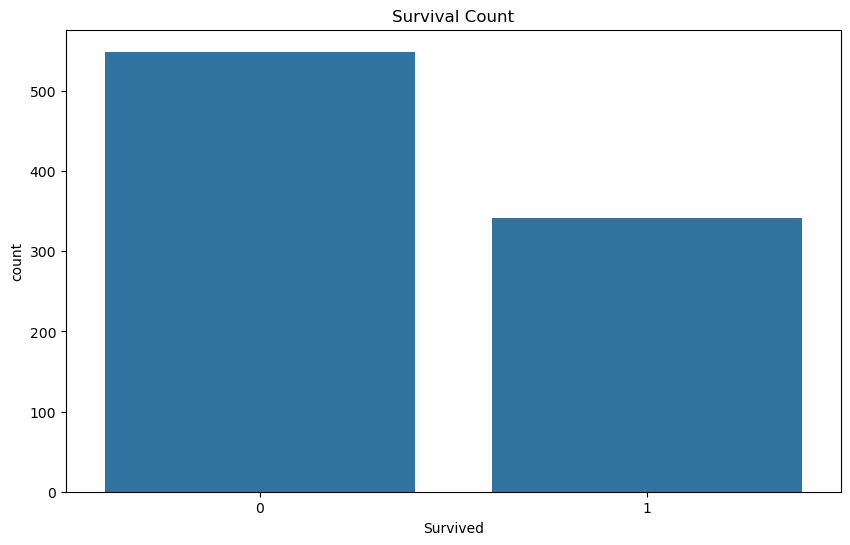

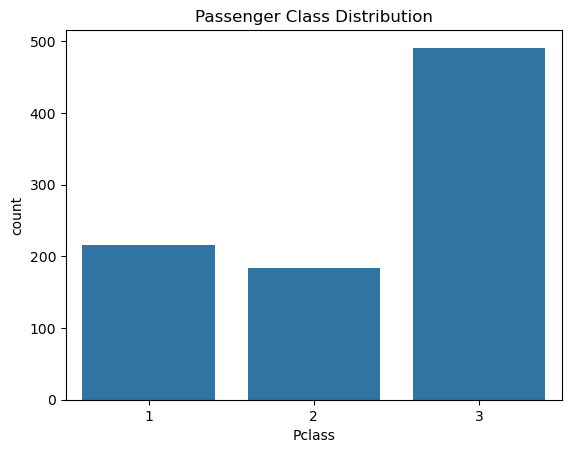

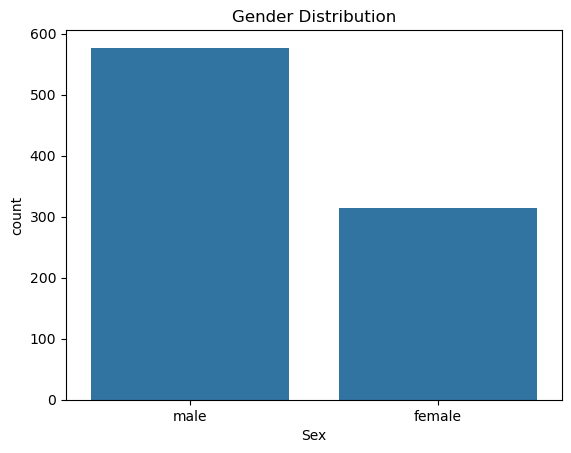

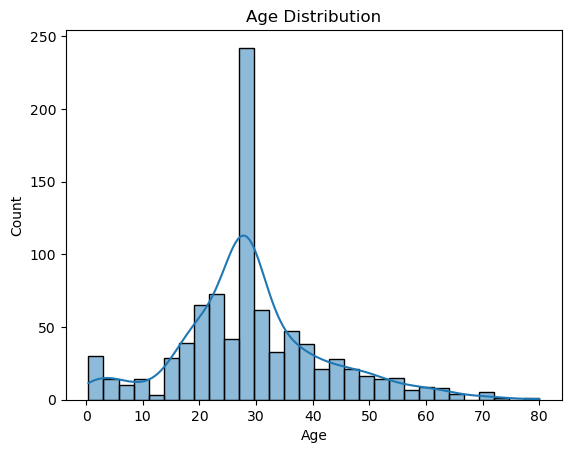

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the distribution of 'Survived'
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

# Plot the distribution of 'Pclass'
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

# Plot the distribution of 'Sex'
sns.countplot(x='Sex', data=train_df)
plt.title('Gender Distribution')
plt.show()

# Plot the distribution of 'Age'
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


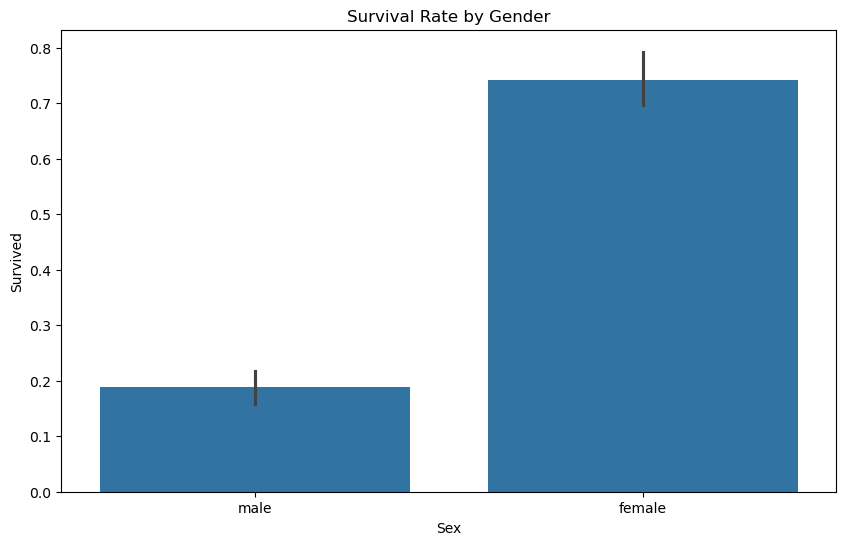

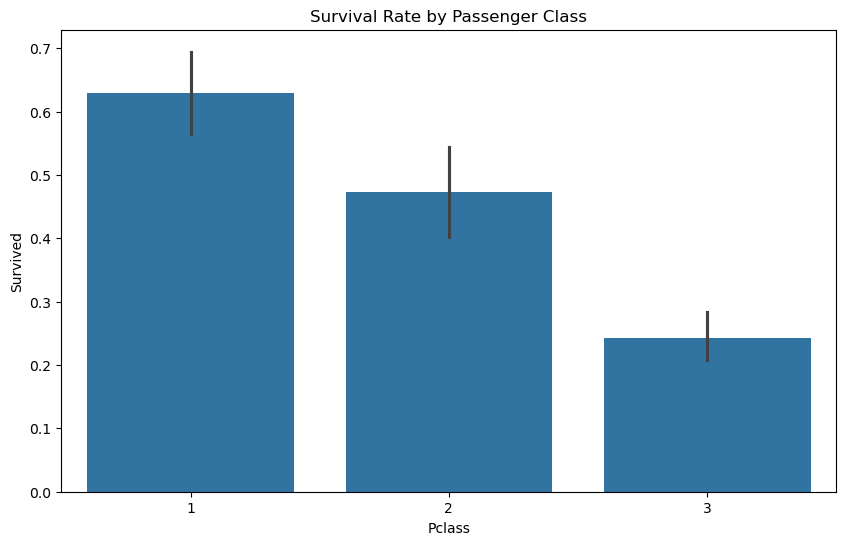

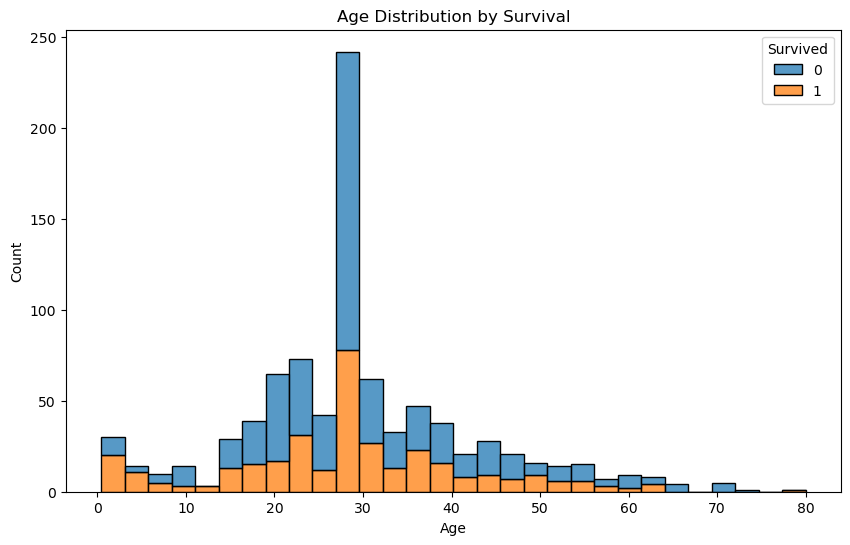

In [9]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()


<Figure size 1000x600 with 0 Axes>

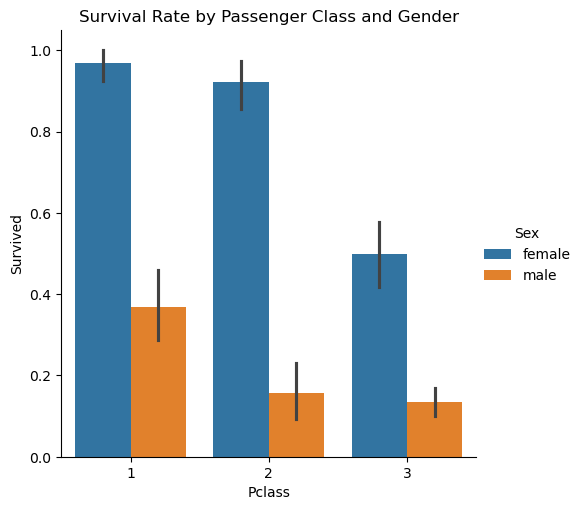

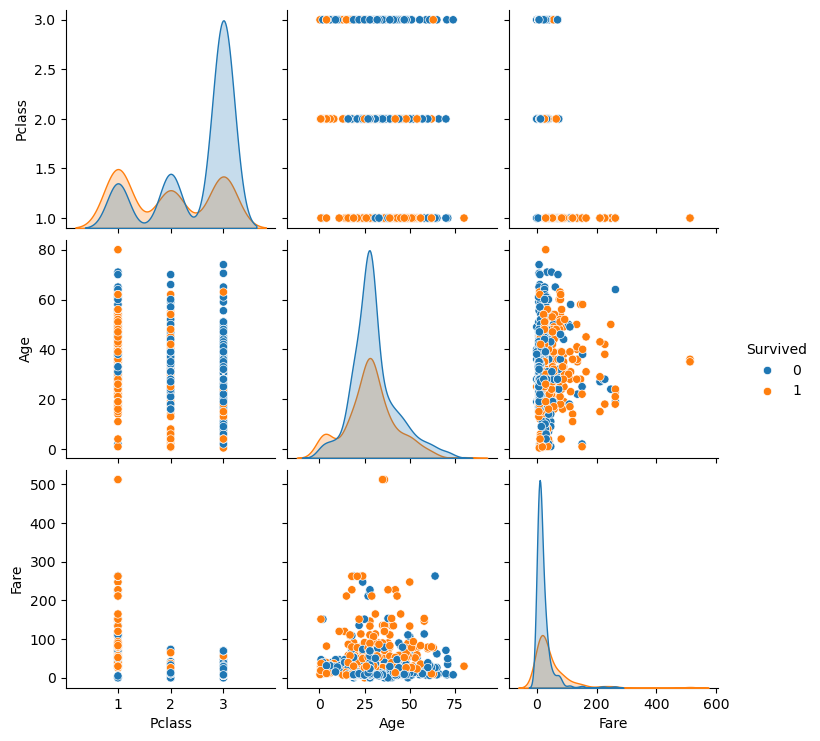

In [10]:
# Survival rate by passenger class and gender
plt.figure(figsize=(10, 6))
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=train_df)
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']
sns.pairplot(train_df[selected_features], hue='Survived')
plt.show()
